In [1]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


pitch = pd.read_excel("reduced_centrocampistas.xlsx")

numeric_vars = ['Transfer_value', 'Exp_contr', 'Age', 'Minutes_pl', 'Minutes_pl_BC', 'NP_goals', 'Pen_goals', 'Pen_goals_BC', 'Assists', 'Interceptions', 'GCA_BC', 'Yellow_cards', 'Red_cards']
pitch[numeric_vars] = StandardScaler().fit_transform(pitch[numeric_vars])

R^2: 0.5250256755565277
MSE: 0.4524710714203393


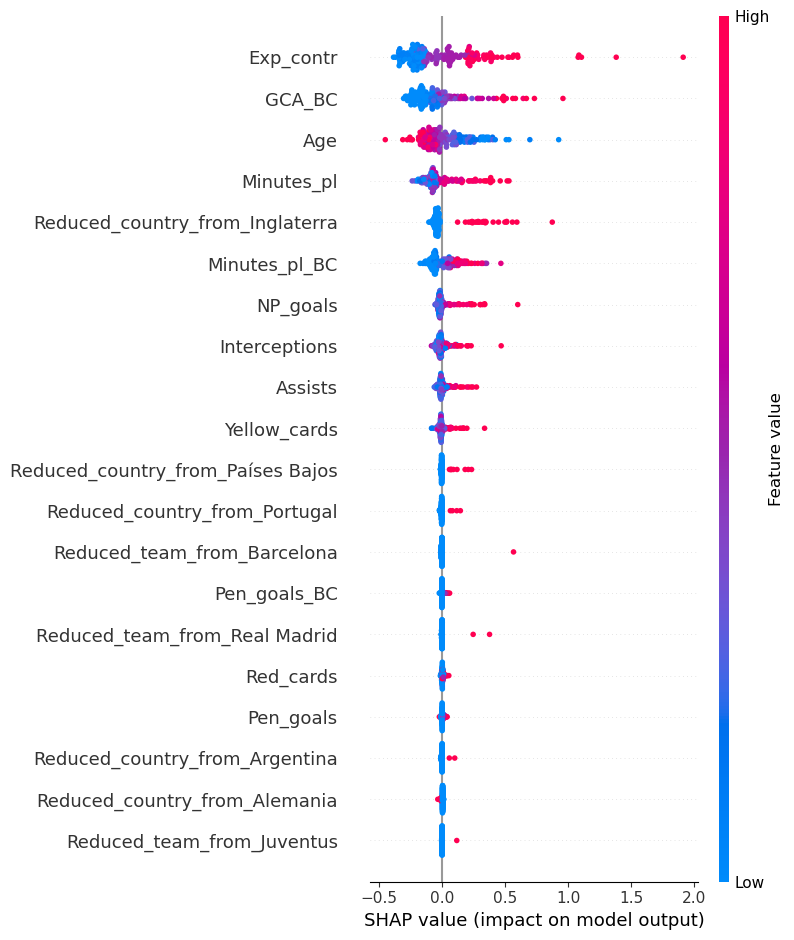

Tiempo de ejecución: 28.319359064102173 segundos


In [2]:
import time

start_time = time.time()

X = pitch.drop("Transfer_value", axis=1)  # Asegúrate de usar las variables significativas
y = pitch['Transfer_value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2: {r2}")
print(f"MSE: {mse}")

# Usar SHAP para explicar el modelo
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizar el resumen de las importancias de las características
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

execution_time = time.time() - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

